In [1]:
%cd /home1/giorgian/projects/trigger-detection-pipeline/sPHENIX/tracking-GNN

In [2]:
from train import load_config
from datasets import get_data_loaders
import matplotlib.pyplot as plt
import numpy as np
from datasets.hit_graph import build_edges, calc_dphi

In [17]:
config = load_config('configs/tracking.yaml')
config['data']['n_mix'] = 20
config['data']['batch_size'] = 1
#config['data']['phi_slope_max'] = 2 * 0.03
#config['data']['z0_max'] = 2 * 200
#config['data'dphi_max][''] = 2*0.03
#config['data']['dz_max'] = 2*200

In [18]:
train_data_loader, valid_data_loader = get_data_loaders(distributed=False, rank=1, n_ranks=1, **config['data'])

In [19]:
vd = iter(valid_data_loader)

In [20]:
data_batch = next(vd)

In [21]:
data_batch

DataBatch(x=[796, 5], edge_index=[2, 617], y=[617], w=[617], i=[1], filename=[1], batch=[796], ptr=[2])

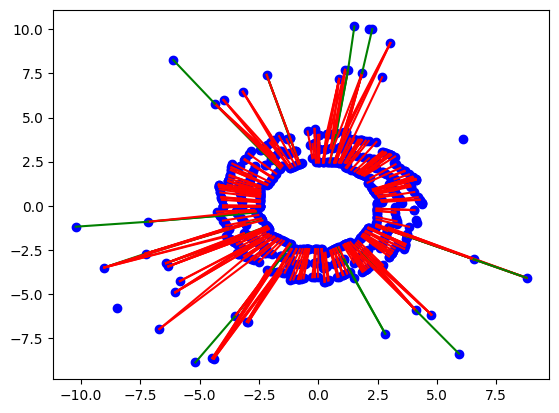

In [22]:
x = data_batch.x
edge_index = data_batch.edge_index
y = data_batch.y
batch = data_batch.batch

# Filter out hits and edges that don't belong to the first batch
x = x[batch == 0]
layer_id = x[:, -1]
edge_index = edge_index[:, batch[edge_index[0]] == 0]
y = y[batch[data_batch.edge_index[0]] == 0]

# Assuming the first three columns of 'x' are the r, phi, and z coordinates
r = x[:, 0] * 3  # scaling back r
phi = x[:, 1]
z = x[:, 2] * 3  # scaling back z

# Convert from cylindrical to Cartesian coordinates
x_coord = r * np.cos(phi)
y_coord = r * np.sin(phi)

# Plot the hit points
plt.scatter(x_coord, y_coord, color='blue')
for i in range(edge_index.shape[1]):
    # The indices of the points connected by the edge
    point1, point2 = edge_index[:, i]
    
    # The x and y coordinates of the points
    x_values = [x_coord[point1], x_coord[point2]]
    y_values = [y_coord[point1], y_coord[point2]]
    
    # If y[i] is 1, the edge is true, otherwise it's a candidate
    color = 'green' if y[i] else 'red'
    
    # Plot the edge
    plt.plot(x_values, y_values, color=color)

plt.show()

